In [41]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
!ls

 tox21_10k_data_consensus_results_f1_opt.csv
 tox21_10k_data_consensus_results_no_bayes.csv
 tox21_10k_data_consensus_results_tuning.csv
 tox21_10k_data_consensus_results_tuning_f1_opt.csv
 tox21_10k_data_hitrate.csv
 tox21_10k_data_results.csv
 tox21_10k_data_results_f1_opt.csv
 tox21_10k_data_results_inc_rdkit_desc.csv
 tox21_10k_data_summary.csv
 tox21_10k_data_summary_f1_opt.csv
 tox21_10k_data_summary_inc_rdkit_desc.csv
 tox21_10k_data_summary_inc_test.csv
 tox21_10k_data_summary_inc_test_with_ba_opt.csv
 tox21_10k_data_tuning_results.csv
 tox21_10k_data_tuning_results_f1_opt.csv
 tox21_10k_data_tuning_summary.csv
'Tox21 Analysis.ipynb'
 tox21_challenge_results.csv
'Tox21 Detailed Analysis.ipynb'
'Tox21 Multi Group Analysis.ipynb'
 tox21_reference_search_results.csv
 tox21_reference_search_results_f1_opt.csv
 tox21_reference_search_results_not_tuned_f1_opt.csv
 tox21_reference_search_results_parallel2.csv
 tox21_reference_search_results_parallel.csv
 tox21_reference_search_results

In [43]:

file = 'tox21_10k_data_summary_inc_test_with_ba_opt.csv'
#file = 'tox21_10k_data_summary_inc_test.csv'
#file = 'tox21_10k_data_summary.csv'
#file = 'tox21_10k_data_tuning_summary.csv'
#file = 'tox21_10k_data_summary_f1_opt.csv'
#file = 'tox21_10k_data_summary_inc_rdkit_desc.csv'
results = pd.read_csv(file)

cons_file = 'tox21_10k_data_consensus_results_tuning.csv'
#cons_file = 'tox21_10k_data_consensus_results_no_bayes.csv'
#cons_file = 'tox21_10k_data_consensus_results.csv'
cons_results = pd.read_csv(cons_file)
cons_results = cons_results[cons_results['Dataset'] == 'Score']
cons_results = cons_results[['ToxAssay', 'RocAUC', 'BA']]
cons_results.rename(columns={'ToxAssay': 'ToxField'}, inplace=True)


In [44]:
results

,ToxField,RocAUC,BA
0,NR-AR,0.749780,0.587041
1,NR-AhR,0.891121,0.735278
2,NR-AR-LBD,0.779635,0.565626
3,NR-ER,0.815889,0.746661
4,NR-ER-LBD,0.776822,0.645395
5,NR-Aromatase,0.801902,0.591388
6,NR-PPAR-gamma,0.765695,0.553571
7,SR-ARE,0.767007,0.668287
8,SR-ATAD5,0.796005,0.613816
9,SR-HSE,0.781013,0.619318


In [45]:
cons_results

,ToxField,RocAUC,BA
2,NR-AR,0.820468,0.712766
5,NR-AhR,0.910169,0.816410
8,NR-AR-LBD,0.727549,0.565626
11,NR-ER,0.796152,0.744617
14,NR-ER-LBD,0.792611,0.698026
17,NR-Aromatase,0.841166,0.744989
20,NR-PPAR-gamma,0.806431,0.616211
23,SR-ARE,0.814612,0.743909
26,SR-ATAD5,0.816881,0.645481
29,SR-HSE,0.785866,0.651515


In [46]:
results.RocAUC.describe()

count    12.000000
mean      0.806938
std       0.057117
min       0.749780
25%       0.774368
50%       0.788509
75%       0.812373
max       0.947182
Name: RocAUC, dtype: float64

In [47]:
results.BA.describe()

count    12.000000
mean      0.644007
std       0.094043
min       0.543524
25%       0.581687
50%       0.616567
75%       0.685035
max       0.858184
Name: BA, dtype: float64

In [48]:
cons_results.RocAUC.describe()

count    12.000000
mean      0.823891
std       0.057733
min       0.727549
25%       0.795267
50%       0.815747
75%       0.828614
max       0.950358
Name: RocAUC, dtype: float64

In [49]:
cons_results.BA.describe()

count    12.000000
mean      0.704725
std       0.097738
min       0.565626
25%       0.638164
50%       0.705396
75%       0.744710
max       0.914177
Name: BA, dtype: float64

y_ticks = np.linspace(0, 1, num=11)
#sns.set_style("whitegrid")
sns.set()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 16))
ax = axes[0]
ax.set(ylim=(0.0,1.0))
ax.set(yticks=y_ticks)
sns.pointplot(x="ToxField", y="RocAUC", data=results, ax=ax)
sns.pointplot(x="ToxField", y="RocAUC", data=cons_results, ax=ax)
ax = axes[1]
ax.set(ylim=(0.0,1.0))
ax.set(yticks=y_ticks)
ax.set(ylim=(0.0,1.0))
sns.pointplot(x="ToxField", y="BA", data=results, ax=ax)
sns.pointplot(x="ToxField", y="BA", data=cons_results, ax=ax)

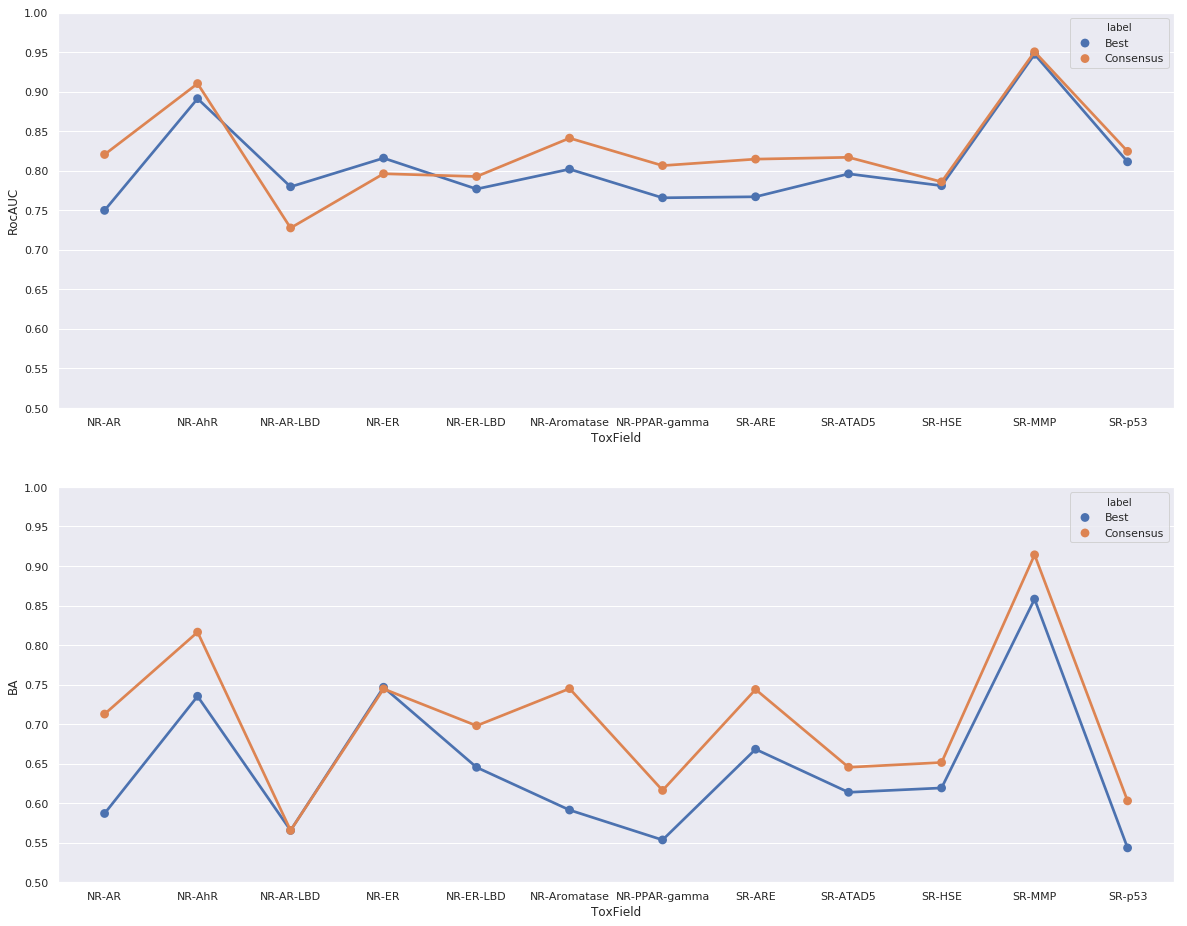

In [50]:
results['label'] = 'Best'
cons_results['label'] = 'Consensus'
all_results = pd.concat([results, cons_results], ignore_index=True)

y_ticks = np.linspace(0.5, 1, num=11)
#sns.set_style("whitegrid")
sns.set()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 16))
ax = axes[0]
ax.set(ylim=(0.5,1.0))
ax.set(yticks=y_ticks)
sns.pointplot(x="ToxField", y="RocAUC", data=all_results, hue='label', ax=ax)
ax = axes[1]
ax.set(ylim=(0.5,1.0))
ax.set(yticks=y_ticks)
sns.pointplot(x="ToxField", y="BA", data=all_results, hue='label', ax=ax)

In [51]:
challenge_results = pd.read_csv('tox21_challenge_results.csv')
challenge_results.rename(columns={'AUC-ROC': 'RocAUC', 'Balanced Accuracy': 'BA', 'Team Name': 'label'}, inplace=True)
challenge_results['label']='Challenge'

#challenge_results


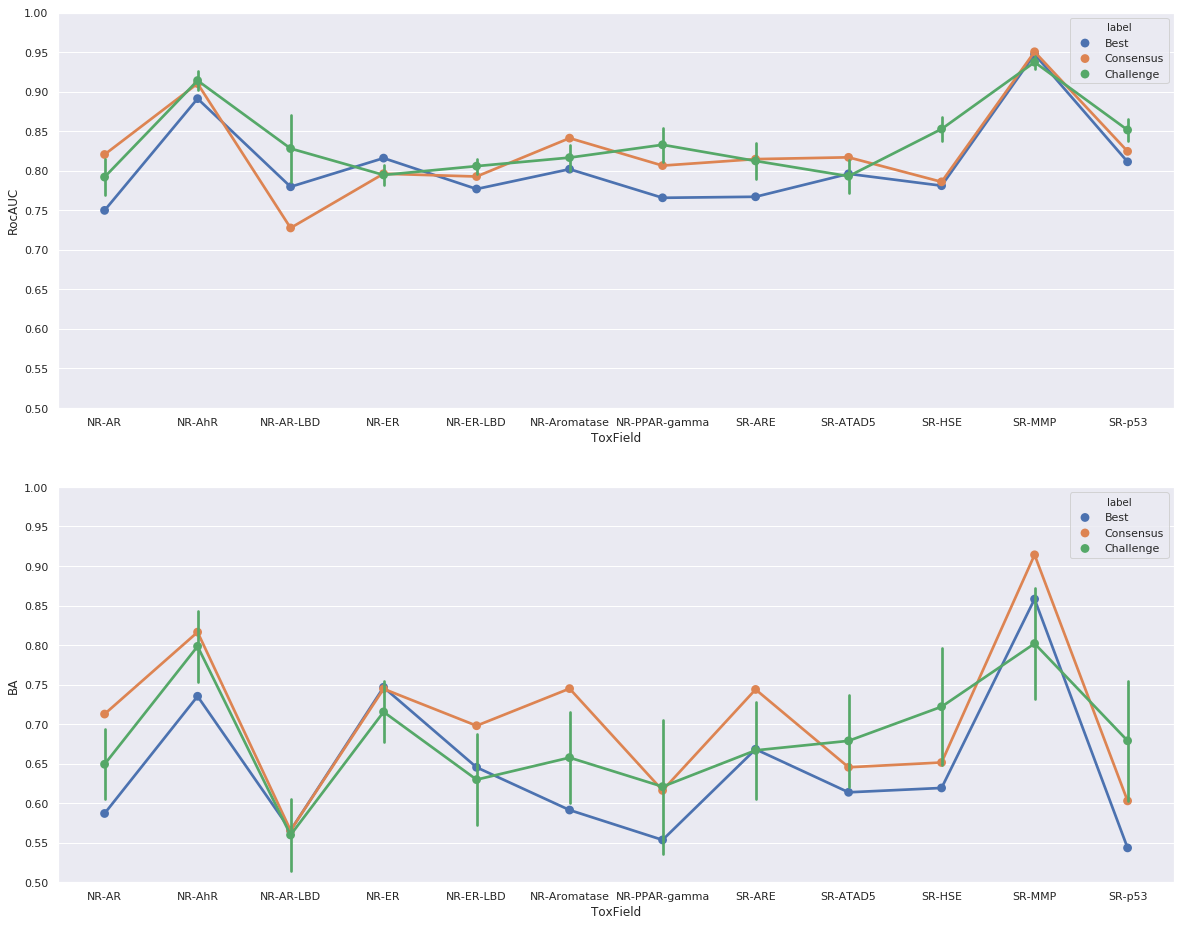

In [52]:

all_results = pd.concat([results, cons_results, challenge_results], ignore_index=True, sort=False)

y_ticks = np.linspace(0.5, 1, num=11)
#sns.set_style("whitegrid")
sns.set()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 16))
ax = axes[0]
ax.set(ylim=(0.5,1.0))
ax.set(yticks=y_ticks)
sns.pointplot(x="ToxField", y="RocAUC", data=all_results, ax=ax, ci='sd', hue='label')
ax = axes[1]
ax.set(ylim=(0.0,1.0))
ax.set(yticks=y_ticks)
ax.set(ylim=(0.5,1.0))
sns.pointplot(x="ToxField", y="BA", data=all_results, hue='label', ci='sd', ax=ax)

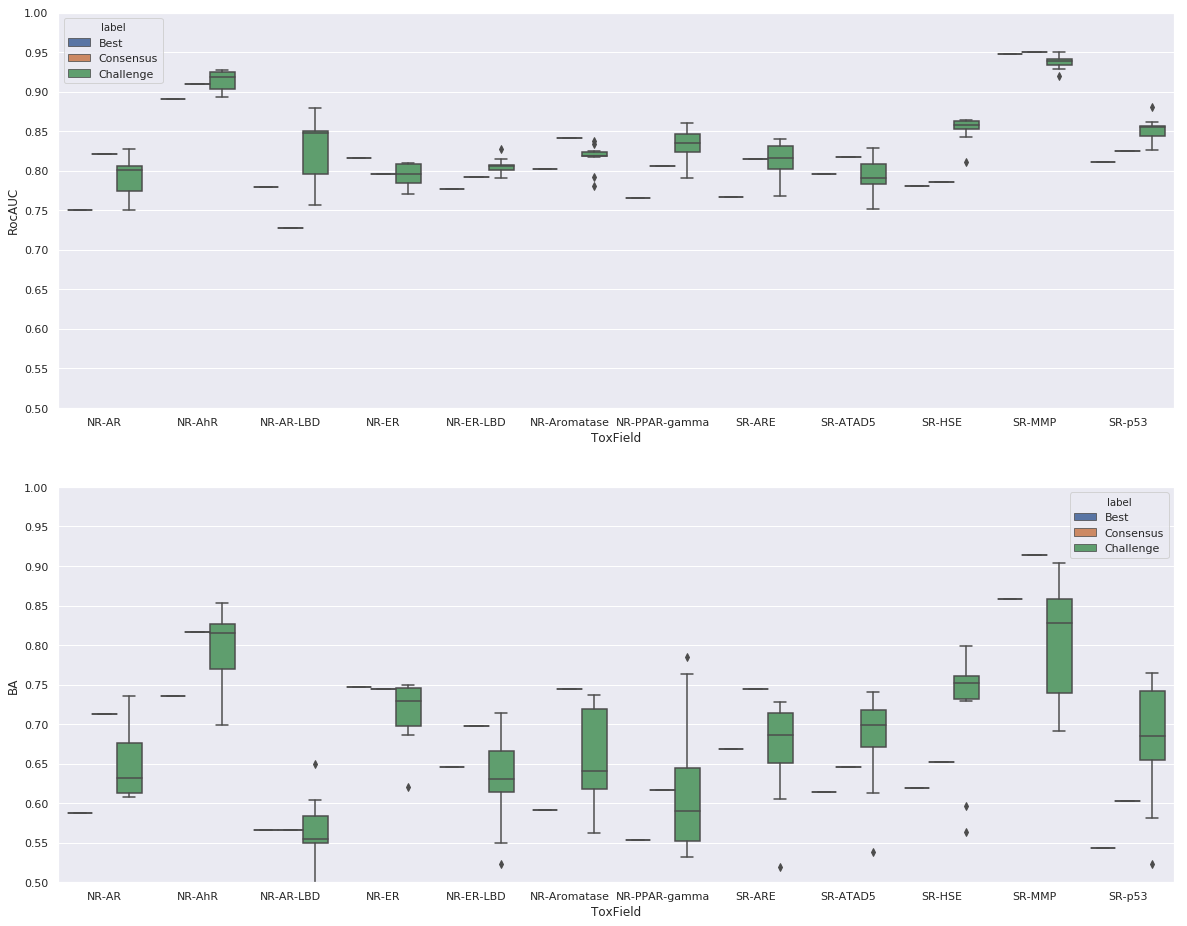

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 16))
ax = axes[0]
ax.set(ylim=(0.5,1.0))
ax.set(yticks=y_ticks)
sns.boxplot(x="ToxField", y="RocAUC", data=all_results, ax=ax, hue='label')
ax = axes[1]
ax.set(ylim=(0.0,1.0))
ax.set(yticks=y_ticks)
ax.set(ylim=(0.5,1.0))
sns.boxplot(x="ToxField", y="BA", data=all_results, hue='label', ax=ax)